In [1]:
import numpy as np
import pylab as p
from time import time
from dcst import dst, idst
from matplotlib import animation 
from scipy import linalg
from matplotlib import animation           
from IPython.display import display, Image
from IPython.display import HTML

def init():
    line.set_data([], [])                     
    return line,

def animate(i):
    line.set_data(x, MA[i])
    return line,

# Definição de funções

In [2]:
def matriz(a1,a2,b = 0, c = 0):
    if b == 0:
        b = a1
        
    A = np.zeros((N,N),float)
    for i in range(1,N-1):
        A[i][i] = a1
        A[i][i-1] = a2
        A[i][i+1] = a2
    A[N-1][0] = c
    A[0][N-2] = c    
    A[0][0] = a1
    A[N-1][N-1] = b
    A[0][1] = a2
    A[N-1][N-2] = a2
    return A

def LU(a,h):    
    c = 1
    M = int(1/a)
    N = M-2
    a1 = 1+2*(c*h)**2/(a**2)
    a2 = -(c*h)**2/(a**2)
    U1 = np.zeros(N)
    U1[0] = a1
    for i in range(1,N):
        U1[i]= a1-a2**2/U1[i-1]
    L1 = np.zeros(N-1)
    for i in range(N-1):
        L1[i] = a2/U1[i]
    return [L1,U1]

def solver(v):
    y = np.zeros(N)
    u = np.zeros(N)
    y[0] = v[0]
    for i in range(1,N):
        y[i] = v[i] - L1[i-1]*y[i-1]
    u[-1] = y[-1]/U1[-1]
    for i in range(N-2,-1,-1):
        u[i]=(y[i] - a2*u[i+1])/U1[i]
    return u

# Exercício 1

## Alínea 1

In [5]:
def matrizOmega(N,a,h):
    I = np.identity(2*N,float)
    H = np.identity(N,float)
    H *= h
    C = np.zeros((N,N),float)
    a1 = 1+2*(c*h)**2/(a**2)
    a2 = -(c*h)**2/(a**2)
    A = matriz(a1,a2)
    for i in range(N-1):
        C[i][i+1] = c**2*h/a**2
        C[i+1][i] = c**2*h/a**2
        C[i][i] = (-2*c**2*h)/a**2
        C[N-1][N-1] = (-2*c**2*h)/a**2
    I[:N,N:] = H    
    I[N:,:N] = C
    J = np.zeros((2*N,2*N),float)
    J[:N,:N] = np.copy(A)
    J[N:,N:] = np.copy(A)
    return np.dot(np.linalg.inv(I),J)

a = 0.005
h = 0.1*a
N1 = 200
N = N1 - 2
c = 1
Omega = np.linalg.inv(matrizOmega(N,a,h))
data1 = np.linalg.eig(Omega)
np.abs(data1[0])

array([ 0.99955381,  0.99955381,  0.9995992 ,  0.9995992 ,  0.99964222,
        0.99964222,  0.99968283,  0.99968283,  0.99972105,  0.99972105,
        0.99982114,  0.99982114,  0.99975684,  0.99975684,  0.99979021,
        0.99979021,  0.99984963,  0.99984963,  0.99987567,  0.99987567,
        0.99989925,  0.99989925,  0.99992036,  0.99992036,  0.99993901,
        0.99993901,  0.99995518,  0.99995518,  0.99996886,  0.99996886,
        0.99998007,  0.99998007,  0.99998879,  0.99998879,  0.99999875,
        0.99999875,  0.99945592,  0.99945592,  0.99950604,  0.99950604,
        0.99940345,  0.99940345,  0.99934864,  0.99934864,  0.99999502,
        0.99999502,  0.9989011 ,  0.9989011 ,  0.99897177,  0.99897177,
        0.99904022,  0.99904022,  0.99910644,  0.99910644,  0.99929153,
        0.99929153,  0.99917041,  0.99917041,  0.99923211,  0.99923211,
        0.99882824,  0.99882824,  0.99875321,  0.99875321,  0.99867601,
        0.99867601,  0.9978879 ,  0.9978879 ,  0.99859669,  0.99

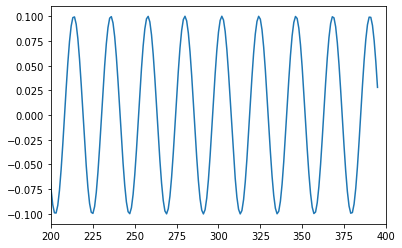

In [6]:
p.plot(np.real((data1[1][:,3])))
p.xlim(200,400)
p.show()

Vemos que os valores próprios da matriz omega são todos próximos de 1, o que nos indica que o método é praticamente estável, como podemos observar nos testes feitos na sub-alínea seguinte.

Vemos também que os vetores próprios são produtos de funções trigonométricas, as funções que representam o $\psi$ e o $\phi$ na transformada de Fourier.

### Solver por decomposição LU

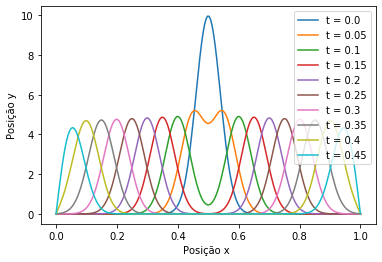

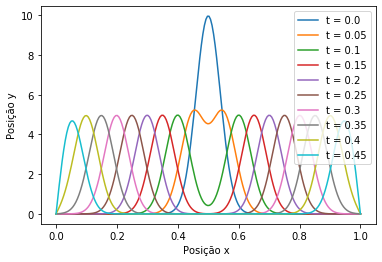

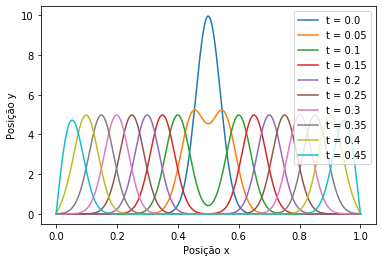

In [25]:
for delta in [0.1,0.01, 0.001]:
    a = 0.005
    N1 = int(1/a)
    h = a*delta
    N = N1-2
    c= 1
    a1 = 1+2*(c*h)**2/(a**2)
    a2 = -(c*h)**2/(a**2)
    data = LU(a,h)
    L1 = data[0]
    U1 = data[1]
    sigma = 0.04
    x = np.linspace(0,1,N1)
    psi = np.exp(-(x-0.5)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
    phi = np.zeros(N1,float)
    t= 0
    temp = np.arange(0,0.5,0.05)
    for i in temp:
        while t < i:
            b1 = psi[1:-1] + h*phi[1:-1]
            b2 = phi[1:-1] +c**2*h/a**2*(psi[2:] + psi[:-2] - 2*psi[1:-1])
            psi[1:-1] = solver(b1)
            phi[1:-1] = solver(b2)
            t += h
        p.plot(x,psi, label = 't = ' + str(i))
    p.xlabel('Posição x ')
    p.ylabel('Posição y')
    p.legend()
    p.show()

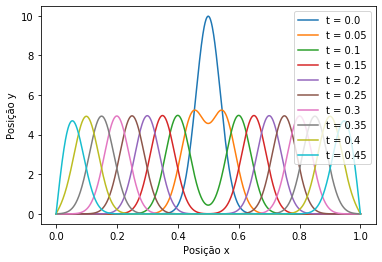

In [26]:
delta = 0.1
a = 0.001
N1 = int(1/a)
h = a*delta
N = N1-2
c= 1
a1 = 1+2*(c*h)**2/(a**2)
a2 = -(c*h)**2/(a**2)
data = LU(a,h)
L1 = data[0]
U1 = data[1]
sigma = 0.04
x = np.linspace(0,1,N1)
psi = np.exp(-(x-0.5)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
phi = np.zeros(N1,float)
t= 0
temp = np.arange(0,0.5,0.05)
for i in temp:
    while t < i:
        b1 = psi[1:-1] + h*phi[1:-1]
        b2 = phi[1:-1] +c**2*h/a**2*(psi[2:] + psi[:-2] - 2*psi[1:-1])
        psi[1:-1] = solver(b1)
        phi[1:-1] = solver(b2)
        t += h
    p.plot(x,psi, label = 't = ' + str(i))
p.xlabel('Posição x ')
p.ylabel('Posição y')
p.legend()
p.show()

### Gauss -Seidel

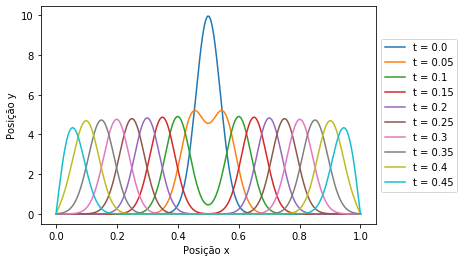

In [27]:
c = 1
a = 0.005
N1 = int(1/a)
N = N1-2
h = 0.1*a

a1 = 1+2*(c*h)**2/(a**2)
a2 = -(c*h)**2/(a**2)
A = matriz(0,a2)
sigma = 0.04
x = np.linspace(0,1,N1)
psi = np.exp(-(x-0.5)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
phi = np.zeros(N1,float)
phi1 = np.zeros(N1,float)
psi1 = np.zeros(N1,float)
temp = np.arange(0,0.5,0.05)
vx = p.subplot(111)
t = 0
for i in temp:
    while t < i:
        erro = 1e-6
        e = 1
        b1 = psi[1:-1] + h*phi[1:-1]
        b2 = phi[1:-1] +c**2*h/a**2*(psi[2:] + psi[:-2] - 2*psi[1:-1])
        while np.abs(e) > erro:
            psi1[1:-1] = 1/a1*(b1- np.dot(A,psi[1:-1]))
            phi1[1:-1] = 1/a1*(b2- np.dot(A,phi[1:-1]))
            e = np.sum(psi1**2-psi**2)
            psi = np.copy(psi1)
            phi = np.copy(phi1)
        t += h
    p.plot(x,psi, label = 't = ' + str(i))
p.xlabel('Posição x ')
p.ylabel('Posição y')
vx.legend(loc = 'center left', bbox_to_anchor=(1,0.5))
p.show()
            
        

## Alínea 2

### Estabilidade de Crank - Nicolson

In [13]:
a=0.005
c= 1
N1 = int(1/a)
h = 0.01*a
N = N1-2
def matrizOmega1(N,a,h):
    a1 = 1+(c*h)**2/(a**2)/2
    a2 = -(c*h)**2/(4*a**2)
    b1 = 1-(c*h)**2/(a**2)/2
    b2 = -a2
    c1 = -2*c**2*h/a**2
    c2 = c**2*h/a**2
    I = np.identity(2*N,float)
    H = np.identity(N,float)
    H *= h
    C = matriz(c1,c2)
    B = matriz(b1,b2)
    A = matriz(a1,a2)
    I[:N,N:] = H    
    I[N:,:N] = C
    I[:N,:N] = B
    I[N:,N:] = B
    J = np.zeros((2*N,2*N),float)
    J[:N,:N] = np.copy(A)
    J[N:,N:] = np.copy(A)
    return np.dot(np.linalg.inv(I),J)
Omega1 = np.linalg.inv(matrizOmega1(N,a,h))
data2 = np.linalg.eig(Omega1)
np.abs(data2[0])

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

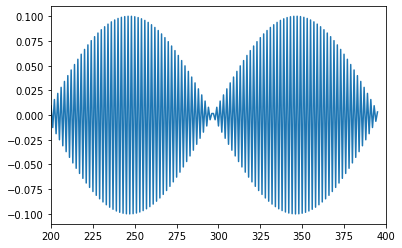

In [18]:
p.plot(np.real(data2[1][:,2]))
p.xlim(200,400)
p.show()

Verificamos que os valores próprios do método de Crank - Nicolson são todos 1, o que nos indica que a solução converge para o valor exato e não decai nem diverge com o tempo.

### Estabilidade da diferença finita centrada no tempo.

In [10]:
a=0.005
c= 1
N1 = int(1/a)
h = 0.01*a
N = N1-2
def matrizOmega2(N,a,h):
    a1 = 1+(c*h)**2/(a**2)/2
    a2 = -(c*h)**2/(4*a**2)
    c1 = -2*c**2*h/a**2
    c2 = c**2*h/a**2
    I = np.identity(2*N,float)
    H = np.identity(N,float)
    H *= h
    In = np.identity(N,float)
    C = matriz(c1,c2)
    A = matriz(a1,a2)
    I[:N,N:] = H    
    I[N:,:N] = C
    I[:N,:N] = In + h*C
    I[N:,N:] = In
    J = np.zeros((2*N,2*N),float)
    J[:N,:N] = np.copy(A)
    J[N:,N:] = np.copy(A)
    return np.dot(np.linalg.inv(I),J)
Omega2 = np.linalg.inv(matrizOmega2(N,a,h))
data3 = np.linalg.eig(Omega2)
np.abs(data3[0])

array([ 0.99990224,  0.99990224,  0.99990201,  0.99990201,  0.99990002,
        0.99990002,  0.99990003,  0.99990003,  0.99990007,  0.99990007,
        0.99990011,  0.99990011,  0.99990017,  0.99990017,  0.99990023,
        0.99990023,  0.99990031,  0.99990031,  0.99990041,  0.99990041,
        0.9999018 ,  0.9999018 ,  0.99990051,  0.99990051,  0.99990063,
        0.99990063,  0.99990076,  0.99990076,  0.9999009 ,  0.9999009 ,
        0.99990106,  0.99990106,  0.9999016 ,  0.9999016 ,  0.99990123,
        0.99990123,  0.99990141,  0.99990141,  0.99990327,  0.99990327,
        0.99990299,  0.99990299,  0.99990273,  0.99990273,  0.99990248,
        0.99990248,  0.99990356,  0.99990356,  0.99990385,  0.99990385,
        0.99990551,  0.99990551,  0.99990516,  0.99990516,  0.99990481,
        0.99990481,  0.99990448,  0.99990448,  0.99990416,  0.99990416,
        0.99990588,  0.99990588,  0.99990625,  0.99990625,  0.99990664,
        0.99990664,  0.99990704,  0.99990704,  0.99991109,  0.99

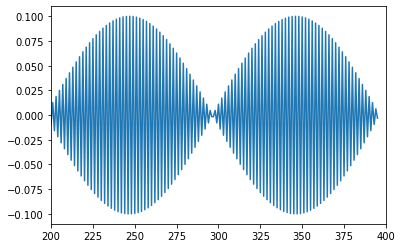

In [24]:
p.plot(np.real(data3[1][:,6]))
p.xlim(200,400)
p.show()

Aqui, vemos que o método de diferenças finitas centradas no tempo tem também valores próprios próximos de 1, embora maiores do que os de Crank-Nicolson e menores do que os do método implícito. Concluimos que, para a equação de onda, os melhores métodos em termos de convergência são, por ordem: Crank-Nicolson, diferenças finitas centradas no tempo e implícito. Porém, o Crank-Nicolson apresenta algumas desvantagens por ser um método mais lento e bem mais difícil de implementar. Por isso, usaremos o método das diferenças finitas centradas no tempo na maioria dos exercícios, por apresentar resultados bastante razoáveis para os nossos propósitos e pela sua fácil implementação. 

### diferença finita centrada

In [32]:
a=0.001
c= 1
N1 = int(1/a)
h = 0.01*a
x = np.linspace(0,1,N1)
psi = np.exp(-(x-0.5)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
phi = np.zeros(N1,float)
temp = np.linspace(0,3,250)
N2 = len(temp)
N3 = int(3/h)
MA = np.zeros((N2,N1),float)
MA[0] = psi
for i in range(N2):
    for j in range(int(N3/N2)):
        phi[1:-1] = phi[1:-1] + c**2*h/a**2*(psi[2:] + psi[0:-2] - 2*psi[1:-1])
        psi[1:-1] = psi[1:-1] + h*phi[1:-1]
        t += h
    MA[i] = psi

In [33]:
fig, ax = p.subplots(figsize=(10,5)) 
line, = ax.plot([], []) 
ax.set_ylim(-10,10)
ax.set_xlim(0,x[-1])
fr = len(MA[:,0])
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=fr-1, interval=20,blit=True)
p.close(anim._fig)
HTML(anim.to_html5_video())

### Crank-Nicolson

In [14]:
delta = 0.1
a = 0.005
N1 = int(1/a)
N = N1 - 2
h = delta*a
a1 = 1+(c*h)**2/(a**2)/2
a2 = -(c*h)**2/(4*a**2)
b1 = 1-(c*h)**2/(a**2)/2
b2 = -a2
c1 = -2*c**2*h/a**2
c2 = c**2*h/a**2
A = np.copy(matriz(a1,a2))
B = np.copy(matriz(b1,b2))
C = np.copy(matriz(c1,c2))
Ai= np.copy(np.linalg.inv(A))
D = np.copy(np.dot(Ai,B))
E = np.copy(np.dot(Ai,C))

In [15]:
x = np.linspace(0,1,N1)
psi = np.exp(-(x-0.5)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
phi = np.zeros(N1,float)
temp = np.linspace(0,1,200)
N2 = len(temp)
N3 = int(1/h)
MA = np.zeros((N2,N1),float)
MA[0] = psi
for i in range(N2):
    for j in range(int(N3/N2)):
        psi[1:-1] = np.copy(np.dot(D,psi[1:-1]) + h*np.dot(Ai,phi[1:-1]))
        phi[1:-1] = np.copy(np.dot(D,phi[1:-1]) + np.dot(E,psi[1:-1]))
    MA[i] = psi

In [16]:
fig, ax = p.subplots(figsize=(10,5)) 
line, = ax.plot([], []) 
ax.set_ylim(-10,10)
ax.set_xlim(0,x[-1])
fr = len(MA[:,0])
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=fr-1, interval=40,blit=True)
p.close(anim._fig)
HTML(anim.to_html5_video())

# Exercício 2

## Alínea 1

   A solução de D'Alembert diz-nos que qualquer onda pode ser interpretada como a sobreposição linear de uma onda  $  f(x-ct) $ que se move para a direita e outra $ g(x + ct) $ a mover-se para a esquerda com a mesma velocidade. No nosso caso, vemos duas gaussianas de igual amplitude a mover-se cada uma para um lado. Isto deve-se às condições iniciais impostas, em particular a condição de que $ \phi $ é zero em $ t = 0 $ : Ao considerarmos a nossa onda como sendo da forma $ \psi(x,t) = Ae^{-b(x-ct-1/2)^2} + Be^{-b(x+ct-1/2)^2} $ , derivarmos em ordem a t e tomarmos a condição inicial $ \phi(x,0) = 0 $ , obtemos $ \phi(x,0) = 2bcAe^{-b(x-1/2)^2} - 2bcAe^{-b(x-1/2)^2} = 0 $. Nisto, obtemos que $ A = B $, o que resulta numa onda da forma $\psi(x,t) = Ae^{-b(x-ct-1/2)^2} + Ae^{-b(x+ct-1/2)^2}$, que se traduz em duas ondas da mesma amplitude a moverem-se em sentidos contrários. 
    

Se quisermos que haja apenas uma onda que se mova para a direita, então fazemos que $ B = 0 $, e obtemos a condição inicial $ \phi(x,0) = 2bcAe^{-b(x-1/2)^2} $, onde $ b $ e $ A $ são determinados pela condição inicial em $\psi$. Vemos este exemplo posto em prática na alínea seguinte.

## Alínea 2

In [17]:
delta = 0.1
a = 0.005
N1 = int(1/a)
h = a*delta
N = N1-2
c= 1
a1 = 1+2*(c*h)**2/(a**2)
a2 = -(c*h)**2/(a**2)
data = LU(a,h)
L1 = data[0]
U1 = data[1]
sigma = 0.04
x = np.linspace(0,1,N1)
psi = np.exp(-(x-0.5)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
phi = psi/sigma**2*(x-0.5)
temp = np.linspace(0,1,200)
N2 = len(temp)
N3 = int(1/h)
MA = np.zeros((N2,N1),float)
for i in range(N2):
    for j in range(int(N3/N2)):
        b1 = psi[1:-1] + h*phi[1:-1]
        b2 = phi[1:-1] +c**2*h/a**2*(psi[2:] + psi[:-2] - 2*psi[1:-1])
        psi[1:-1] = solver(b1)
        phi[1:-1] = solver(b2)
    MA[i] = psi

In [18]:
fig, ax = p.subplots(figsize=(10,5)) 
line, = ax.plot([], []) 
ax.set_ylim(-10,10)
ax.set_xlim(0,x[-1])
fr = len(MA[:,0])
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=fr-1, interval=20,blit=True)
p.close(anim._fig)
HTML(anim.to_html5_video())

Na fronteira verificamos que a onda é refletida, com amplitude negativa e desfasada da onda original por $\pi$.


## Alínea 3 (Condições de Von Neumann)

In [32]:
delta = 0.1
a = 0.005
N1 = int(1/a)
h = a*delta
N = N1-2
c= 1
a1 = 1+2*(c*h)**2/(a**2)
a2 = -(c*h)**2/(a**2)
b = a1 + a2
A = matriz(a1,a2,b)
Ai = np.linalg.inv(A)
sigma = 0.04
x = np.linspace(0,1,N1)
psi = np.exp(-(x-0.5)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
phi = psi/sigma**2*(x-0.5)
temp = np.linspace(0,1.5,100)
N2 = len(temp)
N3 = int(1.5/h)
MA = np.zeros((N2,N1),float)
MA[0] = psi
for i in range(N2):
    for j in range(int(N3/N2)):
        b1 = psi[1:-1] + h*phi[1:-1]
        b2 = phi[1:-1] +c**2*h/a**2*(psi[2:] + psi[:-2] - 2*psi[1:-1])
        psi[1:-1] = np.dot(Ai,b1)
        phi[1:-1] = np.dot(Ai,b2)
        psi[-1] = psi[-2]
        phi[-1] = phi[-2]
    MA[i] = psi

In [33]:
fig, ax = p.subplots(figsize=(10,5)) 
line, = ax.plot([], []) 
ax.set_ylim(-12,12)
ax.set_xlim(0,x[-1])
fr = len(MA[:,0])
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=fr-1, interval=20,blit=True)
p.close(anim._fig)
HTML(anim.to_html5_video())

Na fronteira vemos que a onda já não é refletida como anteriormente, mas sim aumenta a amplitude e volta para trás. Isto deve-se à condição imposta na fronteira que, por causa da ponta não poder dobrar, acaba por ser levantada para cima, voltando para baixo e criando a mesma onda mas no sentido oposto.

## Alínea 4 (Condições periódicas)

In [21]:
delta = 0.1
a = 0.005
N1 = int(1/a)
h = a*delta
N = N1-1
c= 1
a1 = 1+2*(c*h)**2/(a**2)
a2 = -(c*h)**2/(a**2)
c1 = a1
c2 = a2
A = matriz(a1,a2,c1,c2)
Ai = np.linalg.inv(A)
sigma = 0.04
x = np.linspace(0,1,N1)
psi = np.exp(-(x-0.5)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
phi = psi/sigma**2*(x-0.5)
temp = np.linspace(0,2,100)
N2 = len(temp)
N3 = int(2/h)
MA = np.zeros((N2,N1),float)
MA[0] = psi
b2 = np.zeros(N,float)
for i in range(N2):
    for j in range(int(N3/N2)):
        b1 = psi[:-1] + h*phi[:-1]
        b2[0] = phi[0] + c**2*h/a**2*(psi[-2]+psi[1]-2*psi[0])
        b2[1:] = phi[1:-1] +c**2*h/a**2*(psi[2:] + psi[:-2] - 2*psi[1:-1])
        psi[:-1] = np.copy(np.dot(Ai,b1))
        phi[:-1] = np.copy(np.dot(Ai,b2))
        psi[-1] = psi[0]
        phi[-1] = phi[0]
    MA[i] = psi

In [22]:
fig, ax = p.subplots(figsize=(10,5)) 
line, = ax.plot([], []) 
ax.set_ylim(-10,10)
ax.set_xlim(0,x[-1])
fr = len(MA[:,0])
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=fr-1, interval=20,blit=True)
p.close(anim._fig)
HTML(anim.to_html5_video())

# Exercício 3

## Alínea 1


In [23]:
delta = 0.1
a = 0.005
N1 = int(1/a)
h = a*delta
N = N1-2
c= 1
B = 0.001
omega = 8

sigma = 0.04
x = np.linspace(0,1,N1)
psi = np.zeros(N1)
phi = np.zeros(N1)
phi[-1] = B*omega
temp = np.linspace(0,3,200)
N2 = len(temp)
N3 = int(3/h)
MA = np.zeros((N2,N1),float)
MA[0] = psi
t = 0
gama = 0.1
for i in range(N2):
    for j in range(int(N3/N2)):
        phi[1:-1] = (1-h*gama)*phi[1:-1] + c**2*h/a**2*(psi[2:] + psi[:-2] -2*psi[1:-1])
        psi[1:-1] = psi[1:-1] + h*phi[1:-1]
        t += h
        phi[-1] = B*omega*np.cos(omega*t)
        psi[-1] = B*np.sin(omega*t)
    MA[i] = psi

In [24]:
fig, ax = p.subplots(figsize=(10,5)) 
line, = ax.plot([], []) 
ax.set_ylim(-0.01,0.01)
ax.set_xlim(0,x[-1])
fr = len(MA[:,0])
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=fr-1, interval=40,blit=True)
p.close(anim._fig)
HTML(anim.to_html5_video())

## Alínea 2

Omega =  0.628318530718


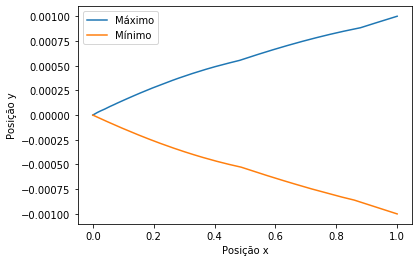

Omega =  1.25663706144


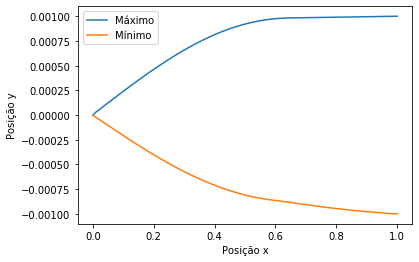

Omega =  1.88495559215


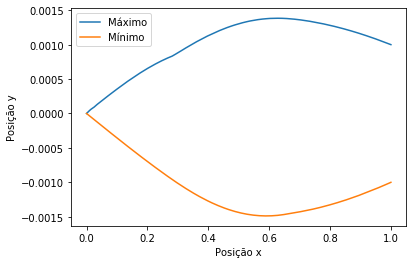

Omega =  2.51327412287


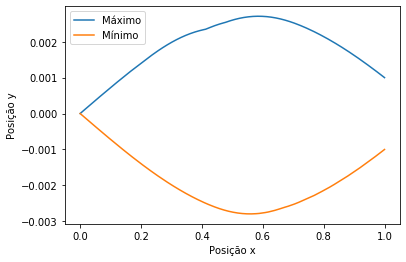

Omega =  3.14159265359


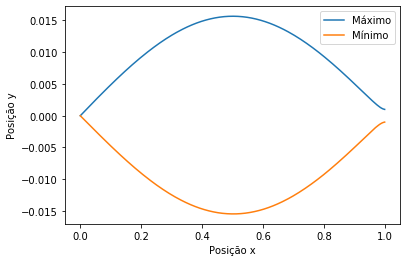

Omega =  3.76991118431


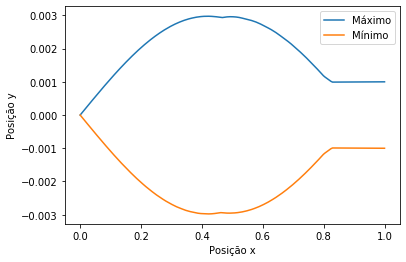

Omega =  4.39822971503


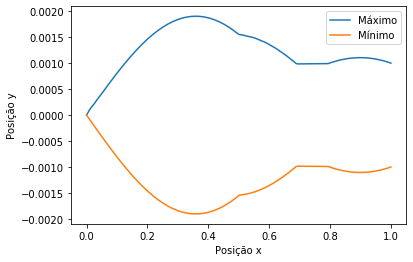

Omega =  5.02654824574


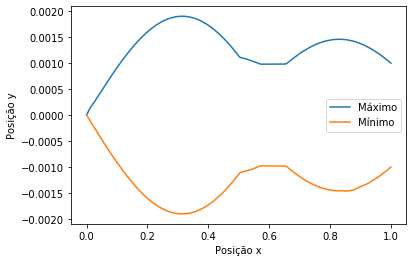

Omega =  5.65486677646


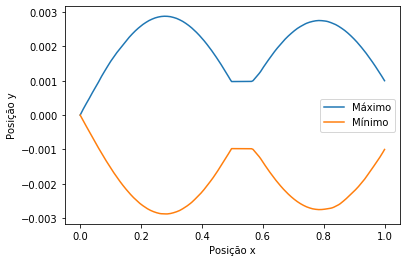

Omega =  6.28318530718


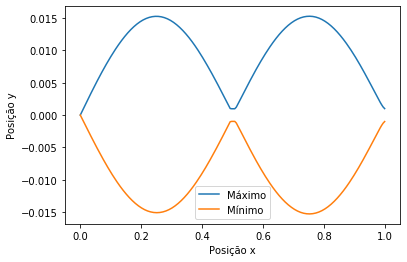

In [25]:
delta = 0.1
a = 0.005
N1 = int(1/a)
h = a*delta
N = N1-2
c= 1
B = 0.001
sigma = 0.04
x = np.linspace(0,1,N1)

for omega in np.arange(1,11,1)*(np.pi/5):
    psi = np.zeros(N1)
    phi = np.zeros(N1)
    phi[-1] = B*omega
    t= 0
    temp = np.arange(0,10*np.pi,0.05)
    gama = 0.1
    max = np.zeros(len(phi),float)
    min = np.zeros(len(phi),float)
    for i in temp:
        b2 = np.zeros(N,float)
        while t < i:
            phi[1:-1] = (1-h*gama)*phi[1:-1] + c**2*h/a**2*(psi[2:] + psi[:-2] -2*psi[1:-1])
            psi[1:-1] = psi[1:-1] + h*phi[1:-1]
            t += h
            phi[-1] = B*omega*np.cos(omega*t)
            psi[-1] = B*np.sin(omega*t)
            for j in range(len(psi)):
                if psi[j] > max[j]:
                    max[j] = psi[j]
                if psi[j] < min[j]:
                    min[j] = psi[j]
    print('Omega = ', omega)
    p.plot(x,max,label= 'Máximo')
    p.plot(x,min, label = 'Mínimo')
    p.ylabel('Posição y')
    p.xlabel('Posição x')
    p.legend()
    p.show()

## Alínea 3

Omega =  3.14159265359


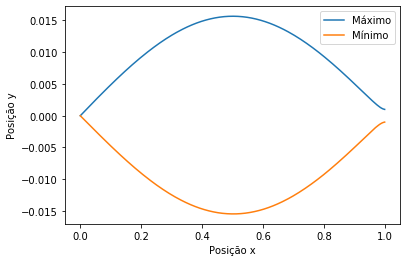

Omega =  6.28318530718


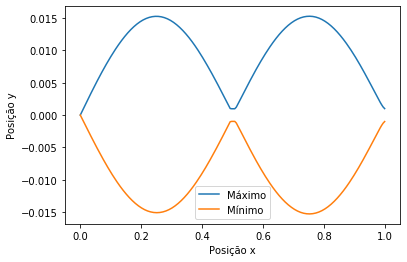

Omega =  9.42477796077


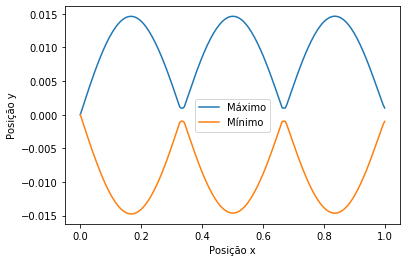

Omega =  12.5663706144


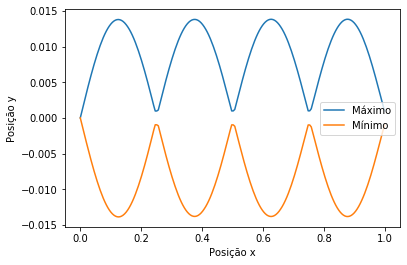

Omega =  15.7079632679


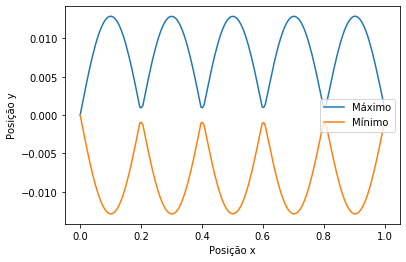

Omega =  18.8495559215


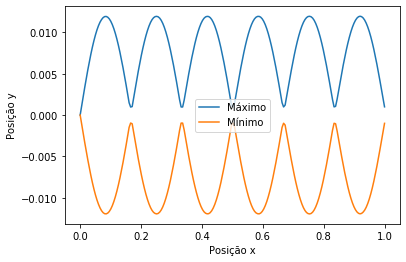

Omega =  21.9911485751


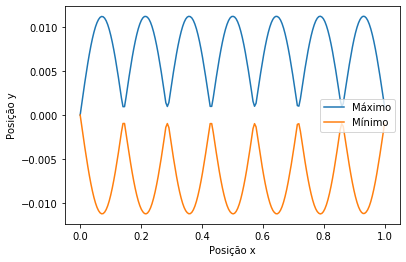

Omega =  25.1327412287


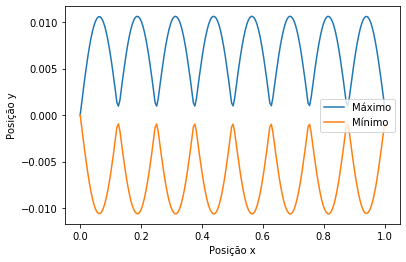

Omega =  28.2743338823


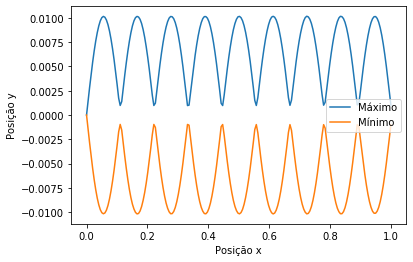

Omega =  31.4159265359


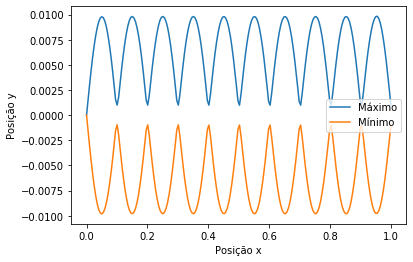

In [26]:
delta = 0.1
a = 0.005
N1 = int(1/a)
h = a*delta
N = N1-2
c= 1
B = 0.001
sigma = 0.04
x = np.linspace(0,1,N1)

for omega in np.arange(1,11,1)*np.pi:
    psi = np.zeros(N1)
    phi = np.zeros(N1)
    phi[-1] = B*omega
    t= 0
    temp = np.arange(0,10*np.pi,0.05)
    gama = 0.1
    max = np.zeros(len(phi),float)
    min = np.zeros(len(phi),float)
    for i in temp:
        b2 = np.zeros(N,float)
        while t < i:
            phi[1:-1] = (1-h*gama)*phi[1:-1] + c**2*h/a**2*(psi[2:] + psi[:-2] -2*psi[1:-1])
            psi[1:-1] = psi[1:-1] + h*phi[1:-1]
            t += h
            phi[-1] = B*omega*np.cos(omega*t)
            psi[-1] = B*np.sin(omega*t)
            for j in range(len(psi)):
                if psi[j] > max[j]:
                    max[j] = psi[j]
                if psi[j] < min[j]:
                    min[j] = psi[j]
    print('Omega = ', omega)
    p.plot(x,max,label= 'Máximo')
    p.plot(x,min, label = 'Mínimo')
    p.ylabel('Posição y')
    p.xlabel('Posição x')
    p.legend()
    p.show()


Aqui vemos os modos normais da corda.

## Alínea 4

Omega =  3.14159265359


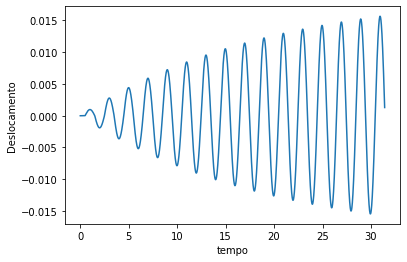

Omega =  6.28318530718


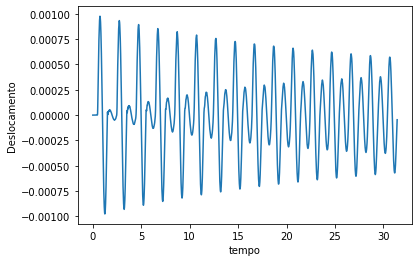

Omega =  9.42477796077


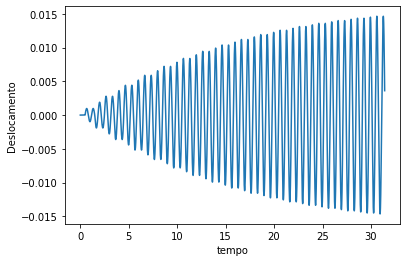

Omega =  12.5663706144


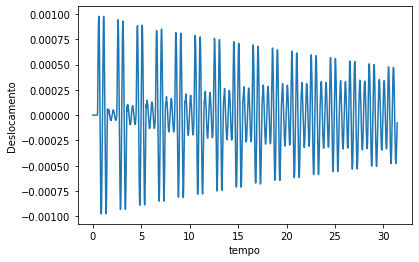

Omega =  15.7079632679


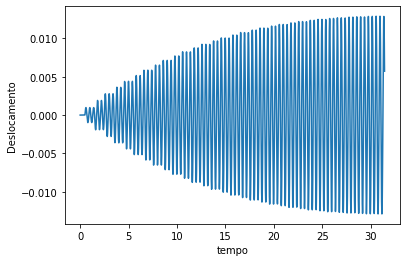

Omega =  18.8495559215


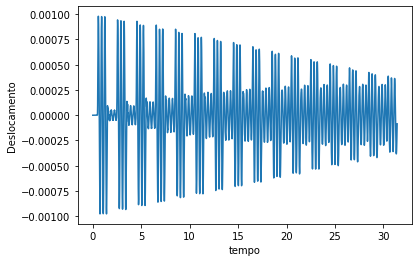

Omega =  21.9911485751


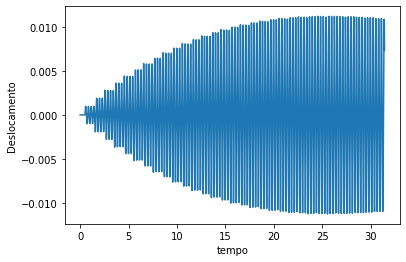

Omega =  25.1327412287


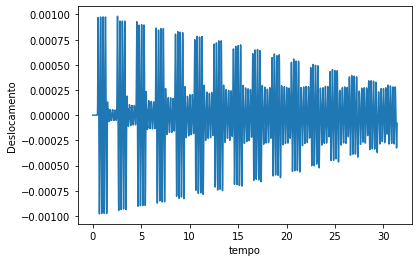

Omega =  28.2743338823


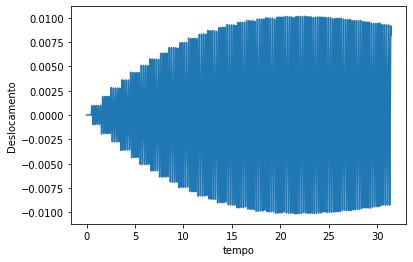

Omega =  31.4159265359


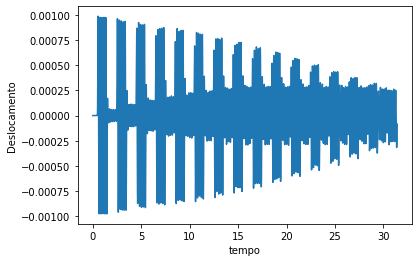

In [27]:
delta = 0.1
a = 0.005
N1 = int(1/a)
h = a*delta
N = N1-2
c= 1
B = 0.001
sigma = 0.04
x = np.linspace(0,1,N1)

for omega in np.arange(1,11,1)*np.pi:
    psi = np.zeros(N1)
    phi = np.zeros(N1)
    phi[-1] = B*omega
    t= 0
    temp = np.arange(0,10*np.pi,h)
    gama = 0.1
    pos = []
    for t in temp:
            phi[1:-1] = (1-h*gama)*phi[1:-1] + c**2*h/a**2*(psi[2:] + psi[:-2] -2*psi[1:-1])
            psi[1:-1] = psi[1:-1] + h*phi[1:-1]
            phi[-1] = B*omega*np.cos(omega*(t+h))
            psi[-1] = B*np.sin(omega*(t+h))
            pos.append(psi[int(N1/2)])
    print('Omega = ', omega)
    p.plot(temp,pos)
    p.ylabel('Deslocamento')
    p.xlabel('tempo')
    p.show()


# Exercício 4

## Alínea 1

In [28]:
delta = 0.1
a = 0.005
N1 = int(1/a)
h = a*delta
N = N1-2
c= np.ones(N,float)
c[int(N/2):] = 1/4
sigma = 0.04
x = np.linspace(0,1,N1)
psi = np.exp(-(x-0.2)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
phi = psi/sigma**2*(x-0.2)
temp = np.linspace(0,5,200)
N2 = len(temp)
N3 = int(5/h)
MA = np.zeros((len(temp),len(psi)),float)
MA[0] = psi
gama = 0
for i in range(1,N2) :
    for j in range(int(N3/N2)):
        phi[1:-1] = (1-h*gama)*phi[1:-1] + c**2*h/a**2*(psi[2:] + psi[:-2] -2*psi[1:-1])
        psi[1:-1] = psi[1:-1] + h*phi[1:-1]
    MA[i] = np.copy(psi)

In [29]:
fig, ax = p.subplots(figsize=(10,5)) 
line, = ax.plot([], []) 
ax.set_ylim(-10,10)
ax.set_xlim(0,x[-1])
fr = len(MA[:,0])
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=fr-1, interval=20,blit=True)
p.close(anim._fig)
HTML(anim.to_html5_video())

## Alínea 2

In [30]:
delta = 0.1
a = 0.005
N1 = int(1/a)
h = a*delta
N = N1-2
x = np.linspace(0,1,N1)
c = 1/(1+100*x[1:-1]**5)
B = 0.001
sigma = 0.04
x = np.linspace(0,1,N1)
psi = np.exp(-(x-0.2)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
phi = psi/sigma**2*(x-0.2)
t= 0
temp = np.linspace(0,5,200)
N2 = len(temp)
N3 = int(5/h)
MA = np.zeros((len(temp),len(psi)),float)
MA[0] = psi
gama = 0
j = 0
for i in range(1,N2) :
    for j in range(int(N3/N2)):
        phi[1:-1] = (1-h*gama)*phi[1:-1] + c**2*h/a**2*(psi[2:] + psi[:-2] -2*psi[1:-1])
        psi[1:-1] = psi[1:-1] + h*phi[1:-1]
    MA[i] = np.copy(psi)

In [31]:
fig, ax = p.subplots(figsize=(10,5)) 
line, = ax.plot([], []) 
ax.set_ylim(-10,10)
ax.set_xlim(0,x[-1])
fr = len(MA[:,0])
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=fr-1, interval=20,blit=True)
p.close(anim._fig)
HTML(anim.to_html5_video())